# IMDb movies dataset: clean up, complete, transform. Predict gross revenues

<b id='top'><h2>Contents</h2></b>

1. [Objectives definition](#section_1)
2. [Data observation](#section_2)
3. [Data preprocessing](#section_3) (prepare and clean data)
4. [Data analysis and transformation](#section_4) (explore the data, identify patterns, engineer new attributes)
6. [Model and predict](#section_5)

<b id='section_1'><h3>Objectives definition</h3></b>[back to contents](#top)

The IMDb dataset was obtained from Kaggle web site [page](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows). It consists of top 1000 movies and tv shows, each characterized with 16 attributes. According to metadata description, data was collected by web scrapping the IMDb web site. The maojor goal of present work was to predict the gross revenue of movies, provided in IMDb Movies Dataset with the help of Random Forest Regressor. The workflow was organized as follows: data preparation, data transformation, modelling, visualization of obtained results.

<b id='section_2'><h3>2. Data observation</h3></b>[back to contents](#top)

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Download the dataset from [Kaggle](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows) and place it into the folder with jupyter notebook.

In [2]:
df = pd.read_csv('../input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

We begin data description by answering following questions.

__Which features are available?__

Feature names are somewhat described at [Kaggle data page](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows). We summarize them as follows:
* Poster_Link - Link to the poster image that IMDb is using
* Series_Title - Title of a movie or a TV episode
* Released_Year - Year a movie was released
* Certificate -  Classification based on film’s suitability for various groups of audience
* Runtime - Total runtime of a movie
* Genre - Genre of a movie
* IMDB_Rating - User ratings of films
* Overview - Movie’s summary
* Meta_score - Critics’ movie review score
* Director - Name of a Director
* Star1,Star2,Star3,Star4 - Names of casting actors
* No_of_Votes - Total number of viewers’ votes
* Gross - Gross revenue

In [3]:
print(df.columns.values)

['Poster_Link' 'Series_Title' 'Released_Year' 'Certificate' 'Runtime'
 'Genre' 'IMDB_Rating' 'Overview' 'Meta_score' 'Director' 'Star1' 'Star2'
 'Star3' 'Star4' 'No_of_Votes' 'Gross']


__Which features are categorical?__

"A categorical variable (also called qualitative variable) refers to a characteristic that can’t be quantifiable. Categorical variables can be either nominal or ordinal." (["Types of variables" by Statistics Canada](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm))

- Nominal: Series_Title, Genre, Overview, Director, Star1, Star2, Star3, Star4
- Ordinal: Certificate (see e.g. [Central Board of Film Certification](https://en.wikipedia.org/wiki/Central_Board_of_Film_Certification))

__Which features are numeric?__

"A numeric variable (also called quantitative variable) is a quantifiable characteristic whose values are numbers (except numbers which are codes standing up for categories). Numeric variables may be either continuous or discrete." (["Types of variables" by Statistics Canada](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm))

- Continuous: Runtime, No_of_Votes, Gross
- Discrete: Released_Year, IMDB_Rating, Meta_score

In [4]:
# Data preview
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


__What are the data types for attributes?__

Two features are floats, one is integer and 13 - strings (objects). 

__Which features contain errors or typos?__

Released_Year might contain errors, as it is classified as numeric, but appears as object data type in the table. Runtime contains alphanumeric values. Gross contains values with several decimal separators, thereby classified as strings.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Further, Certificate feature contains errors, as certificate abbreviature correspond to various film certification systems (Motion Picture Association and Central Board of Film Certification in this dataset).

In [6]:
df.Certificate.value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

### Conclusions based on preliminary data observation

This is the first set of conclusions we draw based on initial data analysis. We are going to complement it by evaluating data after data preprocessing. 
- Make fewer data points, speed up our notebook and ease further analysis
    - Drop Poster_Link as it contains no insight information (only the web link)
    - Create a subset with Overview feature and remove it from main dataset
- Explore, correct and transform the Released_Year feature
- Cleanse and complete Certificate feature
- Correct and transform the Runtime feature
- Correct and transform the Gross feature

<b id='section_3'><h3>3. Data preprocessing</h3></b>[back to contents](#top)

First we are going to drop couple of features to make fewer data points, speed up our notebook and ease further analysis.

In [7]:
df_Overview = df[['Series_Title', 'Overview']]
df = df.drop(df[['Poster_Link', 'Series_Title', 'Overview']], axis=1)
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


`df.info()` does not show any missing values, which means, that some values in Released_Year contain either letters or combination of letters and numbers. By running the command below, we discover, that 967th value contains a typo: string 'PG' instead of year.

In [8]:
df.Released_Year[list(map(str.isalpha, df.Released_Year))]

966    PG
Name: Released_Year, dtype: object

We can replace missing value by finding out the release year, which was 1995.

In [9]:
df.Released_Year[df.Released_Year == 'PG'] = 1995
df.Released_Year = df.Released_Year.astype('int')

Modify the Runtime and Gross features to numeric

In [10]:
# df.Runtime = [x.replace(' min', '') for x in df.Runtime]
# df.Runtime = df.Runtime.astype('int')
df.Runtime = df.Runtime.apply(lambda x: x.replace(' min', '')).astype('int')
df.Gross = df.Gross[df.Gross.notnull()].apply(lambda x: x.replace(',', '')).astype('float')

We are going to set Certificate values to one of the certificate systems. As can be observed, most of film certificates in the dataset are based on [Central Board of Film Certification](https://en.wikipedia.org/wiki/Central_Board_of_Film_Certification) (CBFC) with fewer - on [Motion Picture Association film rating system](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system#:~:text=Rated%20G%3A%20General%20audiences%20%E2%80%93%20All,accompanying%20parent%20or%20adult%20guardian)(MPAA). We are going to rely upon the following comparison table.

| CBFC | MPAA Movies | MPAA TV | Description |
| - | - | - | - |
| U | G, PG | TV-Y, TV-Y7, TV-G, TV-PG | Unrestricted public exhibition, suitable for all ages |
| UA | PG-13 | TV-14 | Unrestricted public exhibition but with caution to give parental guidance for under 12 |
| A | R, NC-17 | TV-MA | Only adults are allowed to view these programs |



In [11]:
certificate_mapping = {}

for i in 'G,PG,TV-Y,TV-Y7,TV-G,TV-PG'.split(','):
    certificate_mapping[i] = 'U'
for i in 'PG-13,TV-14'.split(','):
    certificate_mapping[i] = 'UA'
for i in 'R,NC-17,TV-MA'.split(','):
    certificate_mapping[i] = 'A'
    
df.replace({'Certificate': certificate_mapping}, inplace=True)
df.Certificate.value_counts()

A           344
U           286
UA          219
Passed       34
Approved     11
GP            2
16            1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

Further, we are going to relate values 'Passed', 'Approved', '16', 'U/A' to 'UA' category. Value 'GP' seems to be a typo from 'PG', while 'Unrated' is going to be replaced by the most common certificate.

In [12]:
for i in ['Passed', 'Approved', '16', 'U/A']:
    certificate_mapping[i] = 'UA'

df.Certificate[df.Certificate == 'GP'] = 'PG'
df.replace({'Certificate': certificate_mapping}, inplace=True)
df.Certificate[df.Certificate == 'Unrated'] = df.Certificate.mode()
df.Certificate.value_counts()

A     344
U     288
UA    266
Name: Certificate, dtype: int64

After cleaning Certificate attribute, we still have 102 missing values.

In [13]:
df.Certificate.isnull().sum()

102

In general, films are certified to help an audience make informed viewing choices. In fact, film genres can be considered an essence of movie's content, upon which rating is done. IMDb provides [definitions](https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG?ref_=helpms_helpart_inline#) for each particular genre. In context of current classification problem, we may assume, that, for instance, Family or Fantasy films are more likely to be available for a broad audience without restricions, while such genres as Crime or Horror might contain material inapropriate for kids or teenagers. The Genre attribute of the dataset bears genre tags with some films tagged with few genres. To verify above mentioned assumption, we are going to obtain frequency distribution of film genre tags by certificate type. First, we are going to find out all unique genres in the dataset, and how many times each of them is met.

In [14]:
genres = []
for i in df.Genre:
    j = i.split(', ')
    for n in range(len(j)):
        genres.append(j[n])
genres_unique = np.unique([genre for genre in genres])
genres_count = {genre: genres.count(genre) for genre in genres}

print(pd.DataFrame.from_dict(genres_count, orient='index', columns=['Freq']).sort_values('Freq', ascending=False))
print('-'*30)
print('Total number of genres is ', len(genres_unique))

           Freq
Drama       724
Comedy      233
Crime       209
Adventure   196
Action      189
Thriller    137
Romance     125
Biography   109
Mystery      99
Animation    82
Sci-Fi       67
Fantasy      66
History      56
Family       56
War          51
Music        35
Horror       32
Western      20
Film-Noir    19
Sport        19
Musical      17
------------------------------
Total number of genres is  21


Thus, there are 21 unique genre tags with Drama being the most common. Further, we are going to check their frequency distribution by certificate type.

In [15]:
genre_freq = pd.DataFrame(index=genres_unique, columns=['U', 'UA', 'A', 'Mode'])
for genre in genres_unique:
    genre_freq.loc[genre, ['U', 'UA', 'A']] = df.Certificate[df.Genre.map(lambda x: genre in x)].value_counts()[['U', 'UA', 'A']]
    genre_freq.loc[genre, ['Mode']] = df.Certificate[df.Genre.str.contains(genre)].mode()[0]
genre_freq

,U,UA,A,Mode
Action,36,81,58,UA
Adventure,96,63,30,U
Animation,66,10,4,U
Biography,35,33,39,A
Comedy,89,61,61,U
Crime,28,39,117,A
Drama,177,188,278,A
Family,46,5,2,U
Fantasy,29,16,16,U
Film-Noir,3,11,1,UA


We may conclude, that our hypothesis is correct. Now we can proceed to replace missing certificate types based on genre tags. In cases of several differnt tags, we are going to use the most frequently appeared certificate in a sample.

In [16]:
def cert_by_genre(genres):
    genres = list(genres.split(', '))
    lst = [genre_freq.loc[genre, 'Mode'] for genre in genres]
    return max(set(lst), key=lst.count)

df.Certificate[df.Certificate.isnull()] = df.Genre[df.Certificate.isnull()].apply(cert_by_genre)
df.Certificate.isnull().sum()

0

<b id='section_4'><h3>4. Data analysis and transformation</h3></b>[back to contents](#top)

For the ease of visual data inspection we will convert Gross feature to millions and No_of_Votes - to thousands.

In [17]:
df.Gross = df.Gross*10**-6
df.No_of_Votes = df.No_of_Votes*10**-3

Further, we convert categorical feature Certificate to numeric

In [18]:
certificate_mapping = {'A': 0, 'UA': 1, 'U': 2}
df.Certificate = df.Certificate.map(certificate_mapping).astype('int')
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,0,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343.110,28.341469
1,1972,0,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620.367,134.966411
2,2008,1,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303.232,534.858444
3,1974,0,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129.952,57.300000
4,1957,2,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689.845,4.360000


The Meta_score is the next attribute containing missing values, which we would like to complete. [IMDb](https://www.imdb.com/list/ls051211184/) defines the term "metascore" as weighted average of "movie's reviews of large group of the world's most respected critics". It is worth noting, that movies get a metascore only if at least four critics' reviews are collected. This means, that some movies might simply have no metascore due to lack of critics' reviews. To fill missing values, we may generate random numbers based on mean and standard deviation of existing Meta_score data, but it will introduce random noize to our analysis. Alternatively, we could do na filling same way we guessed missing Certificates, i.e. relating Meta_score to Genre, but critics' reviews turn out to be unrelated to films' genres.

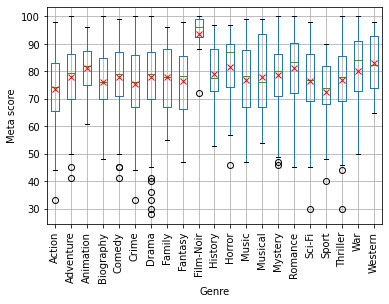

In [19]:
scores_by_genre = {genre: df.Meta_score[df.Genre.str.contains(genre)] for genre in genres_unique}

ax = pd.DataFrame.from_dict(scores_by_genre).boxplot(
                                                     rot=90, 
                                                     showmeans=True,
                                                     meanprops=dict(marker='x', markeredgecolor='red')
                                                     )
ax.set_ylabel('Meta score')
ax.set_xlabel('Genre');

We may hypothesize, that critics' feedback should reflect, whether a movie is worth to watch for an average spectator. In turn, availability of critics' scores would be related to number of viewers and generated revenue. Contrary, it is observed, that Meta_score is correlated neither with Gross feature nor with No_of_Votes. Further, we are going to create a new attribute IsScored.

In [20]:
print(df.Meta_score.corr(df.Gross))
print(df.Meta_score.corr(df.No_of_Votes))

-0.030587043334493573
-0.018506971505862183


No_of_Votes                                                             \
        count        mean         std     min      25%      50%      75%   
0       157.0   61.631554   45.477755  25.088  33.3540   46.700   67.927   
1       843.0  313.187138  341.798846  25.198  71.0235  184.966  439.631   

             
        max  
0   311.365  
1  2343.110

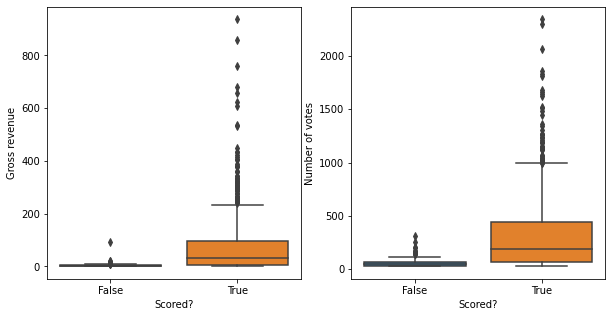

In [21]:
df['IsScored'] = df.Meta_score.notnull()

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True)
fig.suptitle('')

sns.boxplot(data=df, ax=ax[0], x='IsScored', y='Gross')
ax[0].set_xlabel('Scored?')
ax[0].set_ylabel('Gross revenue')

sns.boxplot(data=df, ax=ax[1], x='IsScored', y='No_of_Votes')
ax[1].set_xlabel('Scored?')
ax[1].set_ylabel('Number of votes')

# df.No_of_Votes[df.Meta_score.notnull()].describe()
df[['IsScored', 'No_of_Votes']].groupby('IsScored', as_index=False).describe()

From plots above, we may see, that movies without critics' reviews are more likely to have less audience attention, and, thus, generate less revenues, and/or other way round: movies with low views and poor budget returns are less likely to attract globally recognized critics.

0.1919033943726487
0.27968705447593156


,IsScored,Gross
0,False,3.985506
1,True,74.952069


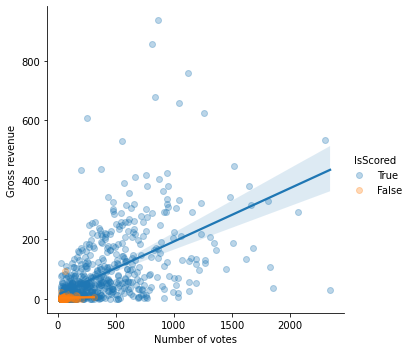

In [22]:
ax = sns.lmplot(data=df, x='No_of_Votes', y='Gross', hue='IsScored', scatter_kws={'alpha':0.3}, hue_order=[True,False])
ax.set(xlabel='Number of votes', ylabel='Gross revenue')

print(df.IsScored.corr(df.Gross))
print(df.IsScored.corr(df.No_of_Votes))
df[['Gross', 'IsScored']].groupby('IsScored', as_index=False).mean()

We may now remove Meta_score from dataset in favor of IsScored

In [23]:
df.drop(['Meta_score'], axis=1, inplace=True)
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IsScored
0,1994,0,142,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343.110,28.341469,True
1,1972,0,175,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620.367,134.966411,True
2,2008,1,152,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303.232,534.858444,True
3,1974,0,202,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129.952,57.300000,True
4,1957,2,96,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689.845,4.360000,True


There are four features related to actors cast: Star1, Star2, Star3 and Star4. In the following we are going to combine these into new attribute. It is worth noting, that [IMDb](https://help.imdb.com/article/contribution/filmography-credits/how-are-cast-credits-ordered-why-don-t-the-main-stars-appear-at-the-top-of-the-cast/G39K5N4YYV2QJ4GR?ref_=helpsect_pro_3_4#) reproduces cast lists in the same order they appeared in a movies' end titles. This means, that names are not arranged by the popularity of particular actor, but rather credited, for instance, in order of appearance in a series, or in alphabetical order. To engeneer an attribute, we are going to use the following logic: the higher the class cast of actors composing a starring group, more likely a movie will attract large audience and generate large revenues. The first instance of an actor appearance in the dataset is set to be 0. It will increment by 1 each subsequent appearance in chronological order, if any. The Act_aprnc feature, thus, reflects the sum of appearances of all four actors by series.

First, we create a list of unique actors that are met in columns Star1 through to Star4.

In [24]:
actors = []
cols = ['Star1', 'Star2', 'Star3', 'Star4']
for col in cols:
    actors.append(df[col].unique())
actors = np.unique([item for sublist in actors for item in sublist])
actors

array(['Aamir Bashir', 'Aamir Khan', 'Aaron Eckhart', ...,
       'Éric Toledano', 'Ömer Faruk Sorak', 'Özge Özberk'], dtype='<U27')

Then, we estimate appearances for every actor, considering the year of series release, and sum them up. We may drop features Star1, Star2, Star3 and Star4, thereafter.

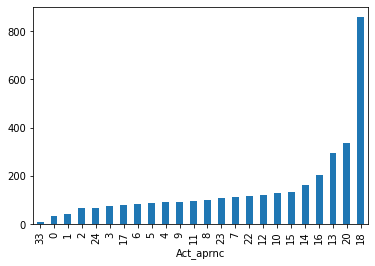

In [25]:
df['Act_aprnc'] = 0
for actor in actors:
    dummy = df[['Star1', 'Star2', 'Star3', 'Star4']] == actor
    index = dummy[dummy.apply(lambda x: any(x), axis=1)].index.values
    index = df.loc[index].sort_values('Released_Year').index.values
    aprnc = range(len(index))
    df.loc[index, 'Act_aprnc'] = df.loc[index, 'Act_aprnc'] + aprnc

df.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis=1, inplace=True)
df[['Gross', 'Act_aprnc']].groupby('Act_aprnc').mean().sort_values(by='Gross').plot.bar(legend=False);

We are going to create appearance bands and check the correlation with Gross.

Gross                                               \
                count        mean         std       min        25%   
Aprnc_bins                                                           
No-name         620.0   52.508041   94.808030  0.001305   1.892096   
Stand-out       127.0   94.551609  116.798944  0.085433  20.007773   
Crowd-favorite   51.0  107.107886   93.870478  0.349555  23.191447   
Well-known       33.0  197.313210  209.602179  7.000000  56.671993   

                                                    
                       50%         75%         max  
Aprnc_bins                                          
No-name          12.190750   57.163567  936.662225  
Stand-out        46.889293  134.049215  659.325379  
Crowd-favorite   77.911774  168.051046  309.125409  
Well-known      107.100855  335.451311  858.373000

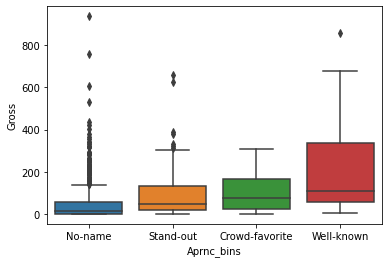

In [26]:
df['Aprnc_bins'] = pd.cut(df.Act_aprnc, 
                          [0,4,8,12,df.Act_aprnc.max()+1], 
                          labels=['No-name', 'Stand-out', 'Crowd-favorite', 'Well-known'],
                          include_lowest=True)

sns.boxplot(data=df, x='Aprnc_bins', y='Gross')
df[['Gross', 'Aprnc_bins']].groupby('Aprnc_bins').describe()

We may conclude, that films with unknown actors tend to gather less cash, than those engaging cinema celebrities. Finally, we are going to create cast class ordinal feature based on appearance bands and remove Act_aprnc and Aprnc_bins from the dataset.

In [27]:
cast_class_mapping = {'No-name': 0, 'Stand-out': 1, 'Crowd-favorite': 2, 'Well-known': 3}
df['Cast_class'] = df.Aprnc_bins.map(cast_class_mapping).astype('int')
df.drop(['Act_aprnc', 'Aprnc_bins'], axis=1, inplace=True)
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross,IsScored,Cast_class
0,1994,0,142,Drama,9.3,Frank Darabont,2343.110,28.341469,True,0
1,1972,0,175,"Crime, Drama",9.2,Francis Ford Coppola,1620.367,134.966411,True,0
2,2008,1,152,"Action, Crime, Drama",9.0,Christopher Nolan,2303.232,534.858444,True,3
3,1974,0,202,"Crime, Drama",9.0,Francis Ford Coppola,1129.952,57.300000,True,0
4,1957,2,96,"Crime, Drama",9.0,Sidney Lumet,689.845,4.360000,True,0


Further, we are going to do the same procedure with Director atrribute.

In [28]:
df['Dir_aprnc'] = 0
for director in df.Director.unique():
    index = df[df.Director == director].sort_values('Released_Year').index.values
    aprnc = range(len(index))
    df.loc[index, 'Dir_aprnc'] = aprnc
    
# df[['Gross', 'Dir_aprnc']].groupby('Dir_aprnc').mean().sort_values(by='Gross').plot.bar(legend=False)

Gross                                                          \
             count        mean         std       min        25%        50%   
Aprnc_bins                                                                   
No-name      611.0   59.122159   90.809236  0.001305   2.459154  18.340051   
Experienced   88.0   86.498356  144.676374  0.085433   4.360000  41.281556   
Blossom       45.0  120.788095  199.041885  0.019181   3.969893  33.080084   
Brand         87.0   84.665736  116.894460  0.012562  10.259930  42.438300   

                                     
                    75%         max  
Aprnc_bins                           
No-name       74.193723  623.279547  
Experienced   87.285945  936.662225  
Blossom      117.624028  858.373000  
Brand        127.761130  760.507625

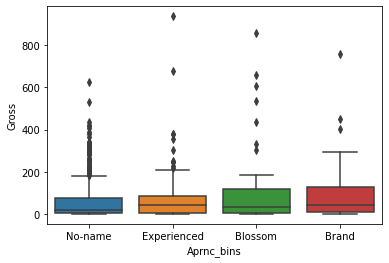

In [29]:
df['Aprnc_bins'] = pd.cut(df.Dir_aprnc, 
                          [0,1,2,3,df.Dir_aprnc.max()+1],
                          labels=['No-name', 'Experienced', 'Blossom', 'Brand'],
                          include_lowest=True)

sns.boxplot(data=df, x='Aprnc_bins', y='Gross')
df[['Gross', 'Aprnc_bins']].groupby('Aprnc_bins').describe()

In [30]:
dir_class_mapping = {'No-name': 0, 'Experienced': 1, 'Blossom': 2, 'Brand': 3}
df['Dir_class'] = df.Aprnc_bins.map(dir_class_mapping).astype('int')
df.drop(['Director', 'Dir_aprnc', 'Aprnc_bins'], axis=1, inplace=True)
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,No_of_Votes,Gross,IsScored,Cast_class,Dir_class
0,1994,0,142,Drama,9.3,2343.110,28.341469,True,0,0
1,1972,0,175,"Crime, Drama",9.2,1620.367,134.966411,True,0,0
2,2008,1,152,"Action, Crime, Drama",9.0,2303.232,534.858444,True,3,2
3,1974,0,202,"Crime, Drama",9.0,1129.952,57.300000,True,0,0
4,1957,2,96,"Crime, Drama",9.0,689.845,4.360000,True,0,0


As mentioned above, the Genre attribute contains genre tags. Moreover, some series have only one tag, while others - two or three. We are going to create Comb feature and determine its correlation with Gross.

,Comb,Gross
0,1,31.076118
1,2,57.368658
2,3,78.330493


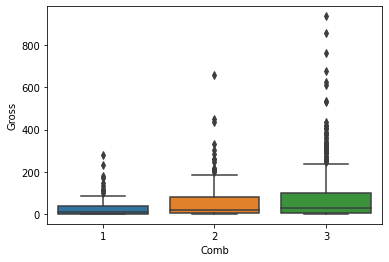

In [31]:
df['Comb'] = df.Genre.apply(lambda x: len(x.split(', ')))

sns.boxplot(data=df, x='Comb', y='Gross');
df[['Gross', 'Comb']].groupby('Comb', as_index=False).mean()

As there are different combinations of genres, it is obvious, that some may match each other naturally, while others are mutually exclusive. First, we are going to define correlations between different genres, based on their occurances in the dataset.

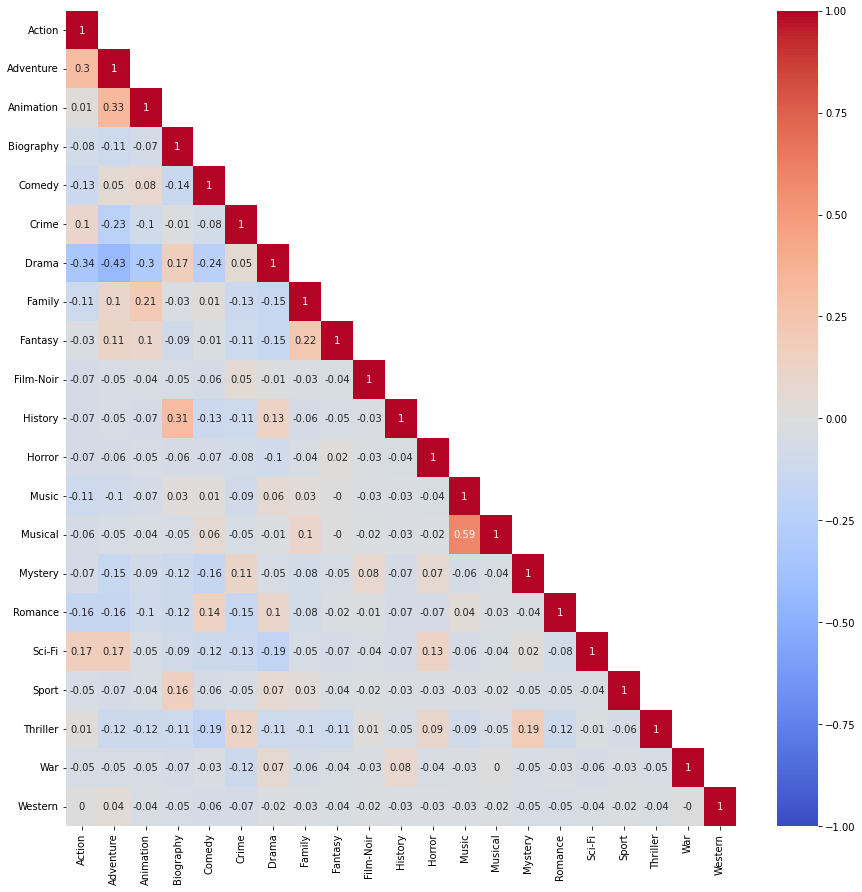

In [32]:
df['dummy'] = 1
genres_matrix = {genre: df.dummy[df.Genre.str.contains(genre)] for genre in genres_unique}
genres_matrix = pd.DataFrame.from_dict(genres_matrix).fillna(0).astype('int')
genres_matrix = genres_matrix.corr()

mask = np.array(genres_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(15, 15))
sns.heatmap(round(genres_matrix,2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm');

Further, we create Genre_weights through intermediate feature Genre_comb and conversion function. The function w takes a list of values from Genre_comb and calculates resulting "weight" of genres, looking into correlation matrix table.

In [33]:
df['Genre_comb'] = df.Genre.apply(lambda x: x.split(', ') + [0]*(3-len(x.split(', '))))

def w(lst=[]):
    x, y, z = lst[0:3]
    if (y,z) == (0,0):
        return genres_matrix[x].drop(x).mean()
    if isinstance(y, str) and z == 0:
        return genres_matrix.loc[x,y]
    
    xy = genres_matrix.loc[x,y]
    xz = genres_matrix.loc[x,z]
    yz = genres_matrix.loc[y,z]

    return (xy + xz + yz)

df['Genre_weights'] = df.Genre_comb.apply(lambda x: w(x))

df[['Comb', 'Genre_weights']].groupby('Comb', as_index=False).mean().sort_values(by='Comb', ascending=False)

,Comb,Genre_weights
2,3,0.040218
1,2,-0.005019
0,1,-0.068165


Further, we can band Genre_weights.

,Genre_bins,Gross
2,Harmonic,156.166612
1,Match,59.841081
0,Mismatch,47.192248


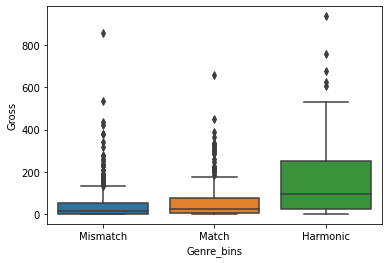

In [34]:
df['Genre_bins'] = pd.cut(df.Genre_weights, [-1,0,0.3,1], labels=['Mismatch', 'Match', 'Harmonic'])

sns.boxplot(data=df, x='Genre_bins', y='Gross')
df[['Gross', 'Genre_bins']].groupby('Genre_bins', as_index=False).mean().sort_values(by='Gross', ascending=False)

Finally we replace Genre with ordinals, based on genre bands, and remove intermediately created attributes.

In [35]:
weight_mapping = {'Mismatch': 0, 'Match': 1, 'Harmonic': 2}
df.Genre = df.Genre_bins.map(weight_mapping).astype('int')

df.drop(['Comb', 'dummy', 'Genre_comb', 'Genre_weights', 'Genre_bins'], axis=1, inplace=True)
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,No_of_Votes,Gross,IsScored,Cast_class,Dir_class
0,1994,0,142,0,9.3,2343.110,28.341469,True,0,0
1,1972,0,175,1,9.2,1620.367,134.966411,True,0,0
2,2008,1,152,0,9.0,2303.232,534.858444,True,3,2
3,1974,0,202,1,9.0,1129.952,57.300000,True,0,0
4,1957,2,96,1,9.0,689.845,4.360000,True,0,0


We also drop rows with missing information about gross revenues.

In [36]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 997
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  831 non-null    int64  
 1   Certificate    831 non-null    int64  
 2   Runtime        831 non-null    int64  
 3   Genre          831 non-null    int64  
 4   IMDB_Rating    831 non-null    float64
 5   No_of_Votes    831 non-null    float64
 6   Gross          831 non-null    float64
 7   IsScored       831 non-null    bool   
 8   Cast_class     831 non-null    int64  
 9   Dir_class      831 non-null    int64  
dtypes: bool(1), float64(3), int64(6)
memory usage: 65.7 KB


<b id='section_5'><h3>5. Model and predict</h3></b>[back to contents](#top)

In this chapter we are going to train a model and predict gross revenue. Since the Gross feature is continuous variable, models selection points on those, capable to perform a regression task. We are going to use random decision forests to identify relationship between the output and attributes we constructed above.

In [37]:
X = df.drop(['Gross'], axis=1)
Y = df.Gross

X_train, X_test, Y_train, Y_true = train_test_split(X, Y, test_size=0.2)

In [38]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_true.values.ravel(), Y_pred)
mse = mean_squared_error(Y_true.values.ravel(), Y_pred)
r2 = r2_score(Y_true.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared:', round(r2, 2))
print('Train score: ', format(model.score(X_train, Y_train),'.2%'))
print('Test score: ', format(model.score(X_test, Y_true.values.ravel()),'.2%'))

Mean Absolute Error: 38.1
Mean Squared Error: 6606.2
R-squared: 0.56
Train score:  94.47%
Test score:  55.89%


In [39]:
features = X.columns.values
importances = model.feature_importances_
indices = importances.argsort()

features_dict={}
for i in indices:
    features_dict[features[i]] = importances[indices][i]

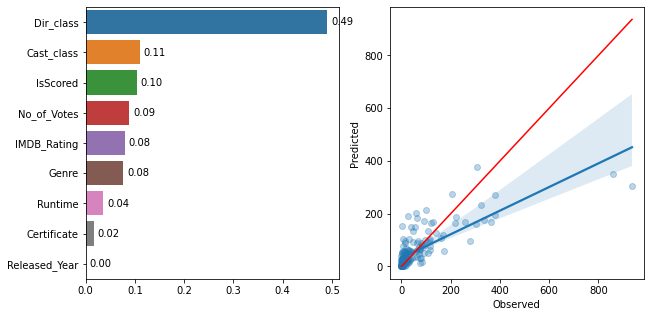

In [40]:
lst = sorted(features_dict.items(), key=lambda item: item[1], reverse=True)
x,y = zip(*lst)

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.barplot(x=list(y),y=list(x), ax=ax[0])

for p in ax[0].patches:
    h, w, y = p.get_height(), p.get_width(), p.get_y()
    ax[0].annotate(format(w, '.2f'), 
                (w, y+h/2.), 
                ha = 'center', va = 'center',
                xytext=(15,0),
                textcoords = 'offset points')
    
lim = round(max(max(Y_true), max(Y_pred)))
xlims=(0,lim)
ylims=(0,lim)
sns.regplot(x=Y_true, y=Y_pred, scatter_kws={'alpha':0.3}, ax=ax[1])
ax[1].plot(xlims, ylims, color='r');
ax[1].set(xlabel='Observed', ylabel='Predicted');